IQR mrthod of outlier detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("loan data.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            2000 non-null   object 
 1   Gender             1308 non-null   object 
 2   Married            1327 non-null   object 
 3   Dependents         1585 non-null   object 
 4   Education          1328 non-null   object 
 5   ApplicantIncome    2000 non-null   int64  
 6   CoapplicantIncome  2000 non-null   float64
 7   LoanAmount         961 non-null    float64
 8   Loan_Amount_Term   1625 non-null   float64
 9   Credit_History     1312 non-null   float64
 10  Property_Area      1477 non-null   object 
 11  Loan_Status        2000 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 187.6+ KB


In [4]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,2000.000000,2000.000000,961.000000,1625.000000,1312.000000
mean,5875.827500,1180.154034,148.041623,220.283077,0.499238
std,2294.145071,1574.316402,56.485990,88.165030,0.500190
min,2000.000000,0.000000,50.000000,120.000000,0.000000
25%,3940.000000,0.000000,102.000000,120.000000,0.000000
50%,5804.000000,0.000000,146.000000,180.000000,0.000000
75%,7797.500000,2264.287417,196.000000,240.000000,1.000000
max,10000.000000,4997.889450,250.000000,360.000000,1.000000


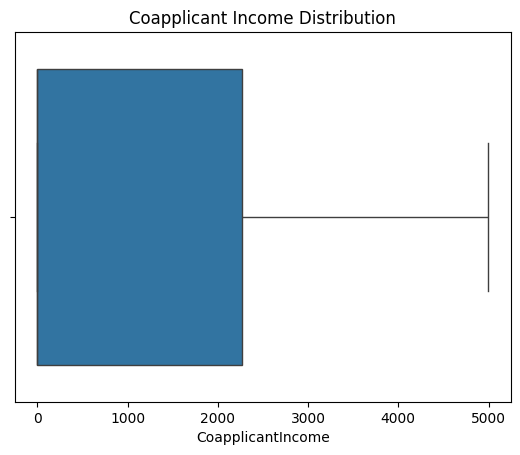

In [12]:
plt.Figure(figsize= (15,5))
sns.boxplot(x="CoapplicantIncome", data=df)
plt.title("Coapplicant Income Distribution")
plt.show()

In [10]:
df.shape

(2000, 12)

In [13]:
q1 = df["CoapplicantIncome"].quantile(0.25)
q3 = df["CoapplicantIncome"].quantile(0.75)

In [14]:
iqr = q3-q1

In [15]:
min_range = q1-(1.5*iqr)
max_range = q3+(1.5*iqr)

In [16]:
min_range, max_range

(np.float64(-3396.4311252469392), np.float64(5660.718542078232))

In [17]:
df

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP0001,Male,Yes,NaN,Graduate,2792,4597.524145,133.0,360.0,NaN,Urban,Y
1,LP0002,NaN,NaN,3+,NaN,5885,0.000000,184.0,120.0,1.0,Rural,Y
2,LP0003,Male,Yes,1,Graduate,3832,0.000000,NaN,120.0,0.0,Rural,Y
3,LP0004,Female,NaN,2,Not Grad,6119,0.000000,NaN,240.0,NaN,NaN,Y
4,LP0005,Male,NaN,0,Not Grad,6434,1071.799900,NaN,360.0,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,LP1996,Male,No,1,NaN,4298,0.000000,NaN,180.0,1.0,Urban,Y
1996,LP1997,NaN,Yes,0,Graduate,3031,1486.758032,143.0,120.0,1.0,Semiurban,N
1997,LP1998,Male,No,2,Not Grad,5612,0.000000,NaN,240.0,1.0,Semiurban,N
1998,LP1999,NaN,NaN,NaN,Not Grad,4741,4959.248789,197.0,NaN,NaN,Semiurban,N


In [21]:
new_df=df[df["CoapplicantIncome"]<=max_range]

In [20]:
df

,Loan_ID,Gender,Married,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP0001,Male,Yes,NaN,Graduate,2792,4597.524145,133.0,360.0,NaN,Urban,Y
1,LP0002,NaN,NaN,3+,NaN,5885,0.000000,184.0,120.0,1.0,Rural,Y
2,LP0003,Male,Yes,1,Graduate,3832,0.000000,NaN,120.0,0.0,Rural,Y
3,LP0004,Female,NaN,2,Not Grad,6119,0.000000,NaN,240.0,NaN,NaN,Y
4,LP0005,Male,NaN,0,Not Grad,6434,1071.799900,NaN,360.0,NaN,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,LP1996,Male,No,1,NaN,4298,0.000000,NaN,180.0,1.0,Urban,Y
1996,LP1997,NaN,Yes,0,Graduate,3031,1486.758032,143.0,120.0,1.0,Semiurban,N
1997,LP1998,Male,No,2,Not Grad,5612,0.000000,NaN,240.0,1.0,Semiurban,N
1998,LP1999,NaN,NaN,NaN,Not Grad,4741,4959.248789,197.0,NaN,NaN,Semiurban,N


In [22]:
new_df.shape

(2000, 12)